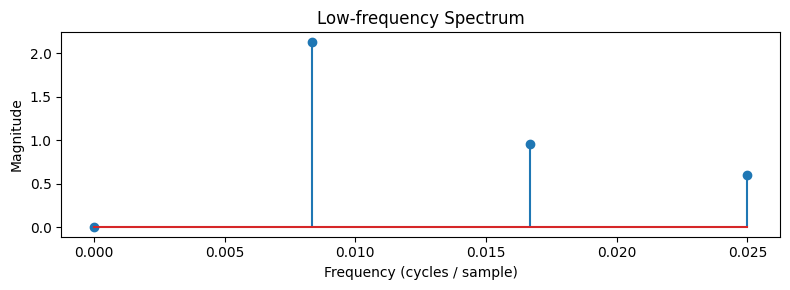

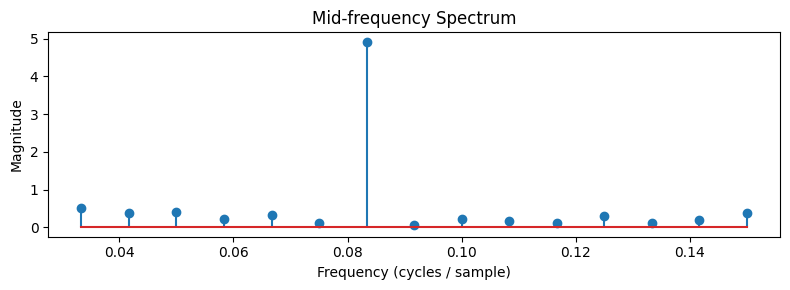

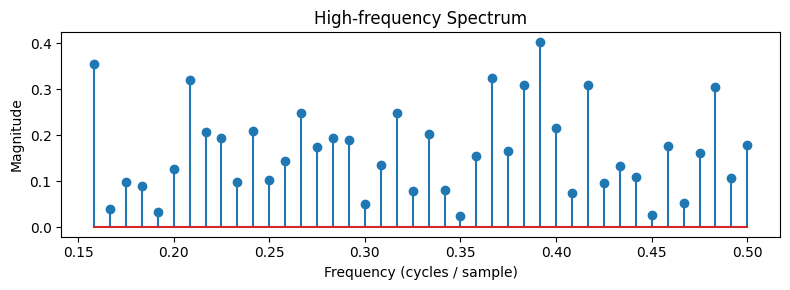

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Build / load a time-series -----------------------------------------
# For demo: synthetic series from earlier (trend + seasonality + noise)
np.random.seed(0)
n_periods = 120
t = np.arange(n_periods)
series = (
    50
    + 0.1 * t                                    # trend
    + 10 * np.sin(2 * np.pi * t / 12)            # seasonality
    + np.random.normal(scale=2, size=n_periods)  # noise
)

# --- 2. FFT and magnitude spectrum ------------------------------------------
signal = series - series.mean()                  # remove DC component
N = len(signal)
freqs = np.fft.rfftfreq(N, d=1)                  # cycles per sample
fft_vals = np.fft.rfft(signal)
magnitude = np.abs(fft_vals) / N

# --- 3. Define three frequency bands ----------------------------------------
low_cut  = 0.03     #   0   – 0.03  cycles/sample   (periods > ~33 samples)
mid_cut  = 0.15     # 0.03 – 0.15  cycles/sample   (periods 7–33 samples)
# high  : >0.15     cycles/sample   (periods < ~7 samples)

mask_low  = freqs <= low_cut
mask_mid  = (freqs > low_cut) & (freqs <= mid_cut)
mask_high = freqs > mid_cut

bands = [
    (mask_low,  "Low-frequency Spectrum"),
    (mask_mid,  "Mid-frequency Spectrum"),
    (mask_high, "High-frequency Spectrum"),
]

# --- 4. Plot each band in its own chart --------------------------------------
for mask, title in bands:
    plt.figure(figsize=(8, 3))
    plt.stem(freqs[mask], magnitude[mask])
    plt.title(title)
    plt.xlabel("Frequency (cycles / sample)")
    plt.ylabel("Magnitude")
    plt.tight_layout()
    plt.show()
